In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('../p2/ML471_S1_Datafile_Practice.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

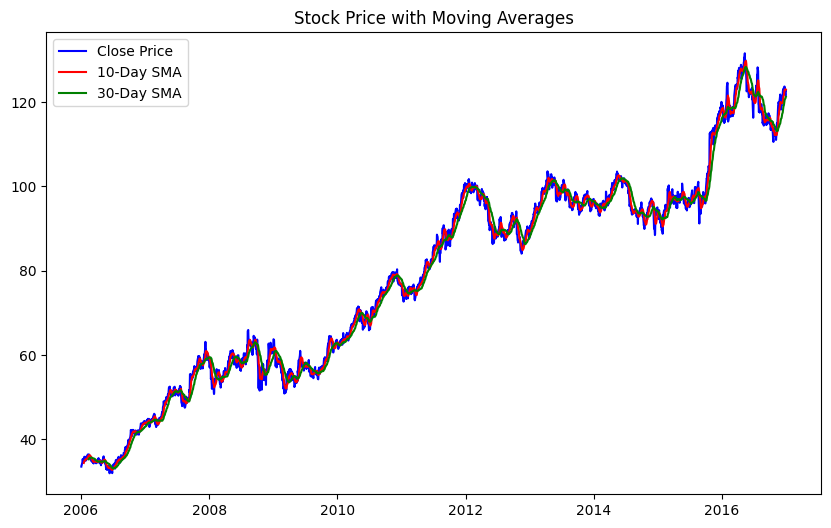

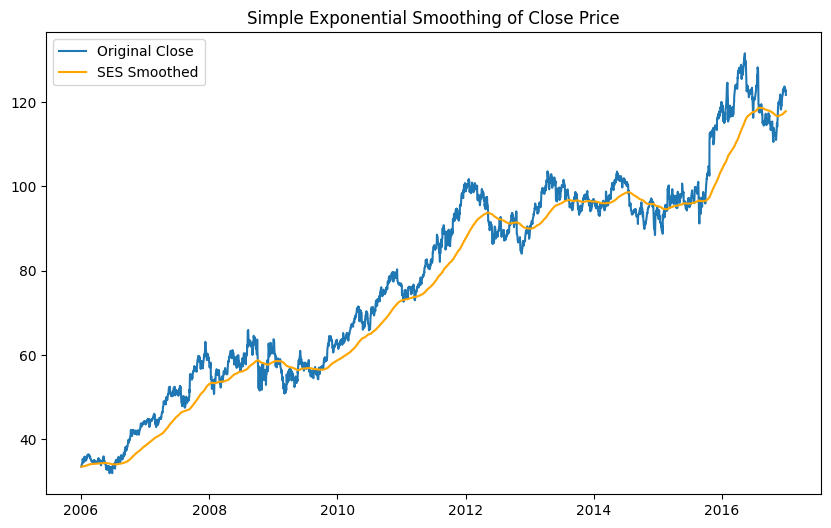

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SMA10'] = df['Close'].rolling(window=10).mean()
df['SMA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['SMA10'], label='10-Day SMA', color='red')
plt.plot(df['Date'], df['SMA30'], label='30-Day SMA', color='green')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

model = SimpleExpSmoothing(df['Close']).fit(smoothing_level=0.01, optimized=False)
df['SES'] = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Original Close')
plt.plot(df['Date'], df['SES'], label='SES Smoothed', color='orange')
plt.title('Simple Exponential Smoothing of Close Price')
plt.legend()
plt.show()